In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your data
x_data = np.array([0.037013222575642074, 0.06744459924817958, 0.09464840566756916, 
                  0.12139113062222334, 0.1435230409295234, 0.1656549512368234, 
                  0.18363712836150464, 0.2043857942745984, 0.22928419337031092, 
                  0.2514161036776109, 0.2721647695907047, 0.29567992429221096, 
                  0.323344812176336, 0.35100970006046095, 0.37867458794458597, 
                  0.4077227202229172, 0.4381540968954548, 0.4685854735679923, 
                  0.4990168502405299, 0.5294482269130674, 0.5598796035856048, 
                  0.5903109802581424, 0.6207423569306799, 0.6511737336032174, 
                  0.681605110275755, 0.7120364869482925, 0.74246786362083, 
                  0.7728992402933675, 0.803330616965905, 0.8337619936384425, 
                  0.8641933703109801, 0.8946247469835176, 0.925056123656055, 
                  0.9554875003285925, 0.98591887700113, 1.0163502536736677, 
                  1.0467816303462052, 1.0772130070187427, 1.1076443836912802, 
                  1.1380757603638176, 1.1685071370363551, 1.1961720249204801])

y_data = np.array([0.9840324174135062, 0.9560770721229174, 0.9163879137016673, 
                  0.868909561423888, 0.8250471101473966, 0.7811846588709053, 
                  0.7458117142930896, 0.7035528365041259, 0.6552569761738816, 
                  0.6104512463753151, 0.5695533847396311, 0.5215000817436347, 
                  0.47886389254584094, 0.4373596375745372, 0.3958553826032335, 
                  0.35598042689733234, 0.32579551419092956, 0.29578210667035876, 
                  0.265597193963956, 0.2465601183366226, 0.22820906345261638, 
                  0.20934349301111466, 0.19699511963122263, 0.1860187877379853, 
                  0.17521396103057985, 0.1680107432256429, 0.16132204097820135, 
                  0.15651989577491, 0.15034570908496403, 0.14794463648331835, 
                  0.14640108981083177, 0.1440000172091862, 0.1440000172091862, 
                  0.14091292386421317, 0.14022690312088582, 0.14022690312088582, 
                  0.14022690312088582, 0.14005539793505395, 0.13834034607673562, 
                  0.1374828201475764, 0.13645378903258554, 0.13666340648193542])

# Define exponential decay function
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the curve
params, covariance = curve_fit(exponential_decay, x_data, y_data, p0=[1, 1, 0])
a, b, c = params

# Generate fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = exponential_decay(x_fit, a, b, c)

# Calculate R-squared
residuals = y_data - exponential_decay(x_data, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data', color='g', marker = "s")
plt.plot(x_fit, y_fit, 'r-', label=f'Exponential Fit: y = {a:.3f}e^(-{b:.3f}x) + {c:.3f}\nR² = {r_squared:.4f}')
plt.xlabel('Barrier Width', fontsize=12)
plt.ylabel('Tunneling Probability', fontsize=12)
plt.title('Exponential Fit of Tunneling Probability vs Barrier Width', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print parameters
print(f"Fit parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}")
print(f"R-squared: {r_squared:.4f}")

Fit parameters: a = 1.1302, b = 3.2971, c = 0.0834
R-squared: 0.9878


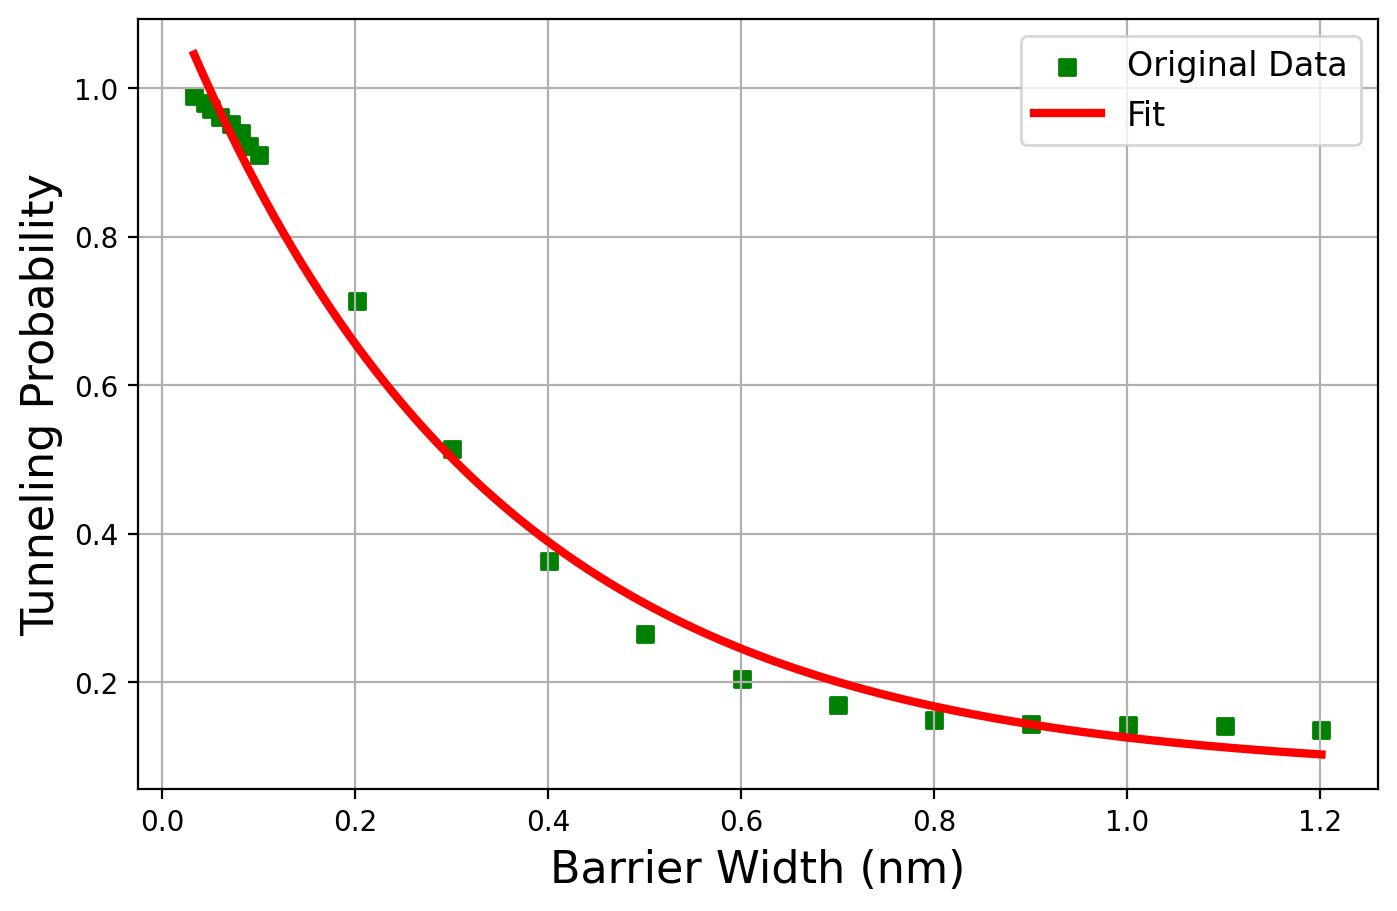

Fitted parameters with uncertainties:
Amplitude (a): 1.07330 ± 0.02453
Decay rate (b): 3.08092 ± 0.27194 (units of 1/[width])
Offset (c): 0.07596 ± 0.02575


NameError: name 'r_squared' is not defined

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your new data
x_data = np.array([0.03302752293577982, 0.0440366972477064, 0.05064220183486237,
                   0.05944954128440366, 0.07155963302752291, 0.08146788990825685,
                   0.09027522935779814, 0.10018348623853207, 0.20146788990825681,
                   0.30055045871559627, 0.4007339449541283, 0.49981651376146774,
                   0.6011009174311925, 0.7001834862385319, 0.7992660550458713,
                   0.9005504587155961, 1.0007339449541282, 1.1009174311926602,
                   1.2011009174311924])

y_data = np.array([0.9894894894894894, 0.9804804804804805, 0.9714714714714714,
                   0.960960960960961, 0.9519519519519519, 0.93993993993994,
                   0.9219219219219219, 0.9099099099099099, 0.7132132132132132,
                   0.5135135135135135, 0.3633633633633633, 0.2642642642642642,
                   0.20420420420420415, 0.16966966966966956, 0.14864864864864857,
                   0.14414414414414423, 0.14264264264264248, 0.14114114114114107,
                   0.13513513513513498])

# Define exponential decay function with offset
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the curve with careful initial guesses
params, covariance = curve_fit(exponential_decay, x_data, y_data, 
                              p0=[1, 10, 0.1], maxfev=10000)
a, b, c = params

# Generate fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = exponential_decay(x_fit, a, b, c)

# Calculate parameter uncertainties
perr = np.sqrt(np.diag(covariance))

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Original Data', color='g',marker = 's')
plt.plot(x_fit, y_fit, 'r-', linewidth=3, 
         label=f'Fit')

plt.xlabel('Barrier Width (nm)', fontsize = 16)
plt.ylabel('Tunneling Probability', fontsize = 16)
plt.legend(fontsize=12, loc='upper right')
plt.grid()  
plt.show()

# Print detailed results
print(f"Fitted parameters with uncertainties:")
print(f"Amplitude (a): {a:.5f} ± {perr[0]:.5f}")
print(f"Decay rate (b): {b:.5f} ± {perr[1]:.5f} (units of 1/[width])")
print(f"Offset (c): {c:.5f} ± {perr[2]:.5f}")
print(f"R-squared: {r_squared:.6f}")
print(f"\nPhysical interpretation:")
print(f"- The decay rate b = {b:.3f} suggests the transmission coefficient follows:")
print(f"  T ≈ exp(-{b:.3f}·L), where L is barrier width")
print(f"- The offset c ≈ {c:.3f} may represent background noise or measurement floor")

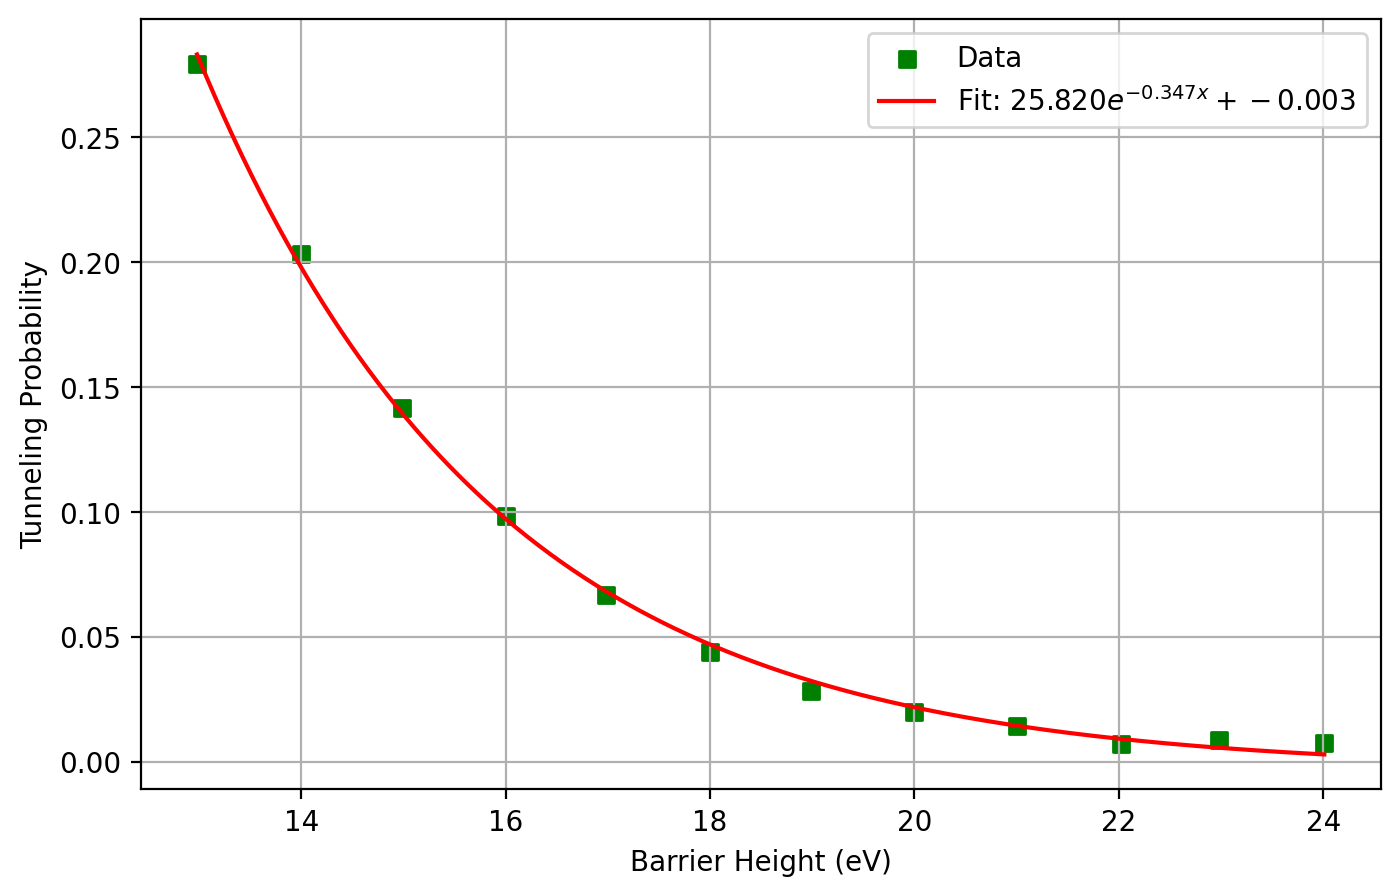

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your specified dataset
x_data = np.array([12.981465560729667, 13.997996353647844, 14.984799287213468,
                   16.00100324420186, 16.977645843428537, 18.00351277573229,
                   18.98986098104778, 19.995861972923777, 21.001834544284137,
                   22.01768324482711, 22.98413708919921, 24.009790867635715])

y_data = np.array([0.2796166640851365, 0.20339426218209888, 0.14157679862785744,
                   0.09849556000494508, 0.06693599841981923, 0.044029062819286535,
                   0.028321043828698045, 0.019820467602743586, 0.01420173166201777,
                   0.00714349660445901, 0.008723677273676733, 0.007430543812356305])

# Exponential decay function
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Perform the fit
params, _ = curve_fit(exponential_decay, x_data, y_data, p0=[1, 0.1, 0.01])
a, b, c = params

# Generate fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = exponential_decay(x_fit, a, b, c)

# Create the plot
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Data', color='green', marker='s')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: ${a:.3f}e^{{-{b:.3f}x}} + {c:.3f}$')
plt.xlabel('Barrier Height (eV)')
plt.ylabel('Tunneling Probability')
plt.legend()
plt.grid(True)
plt.show()

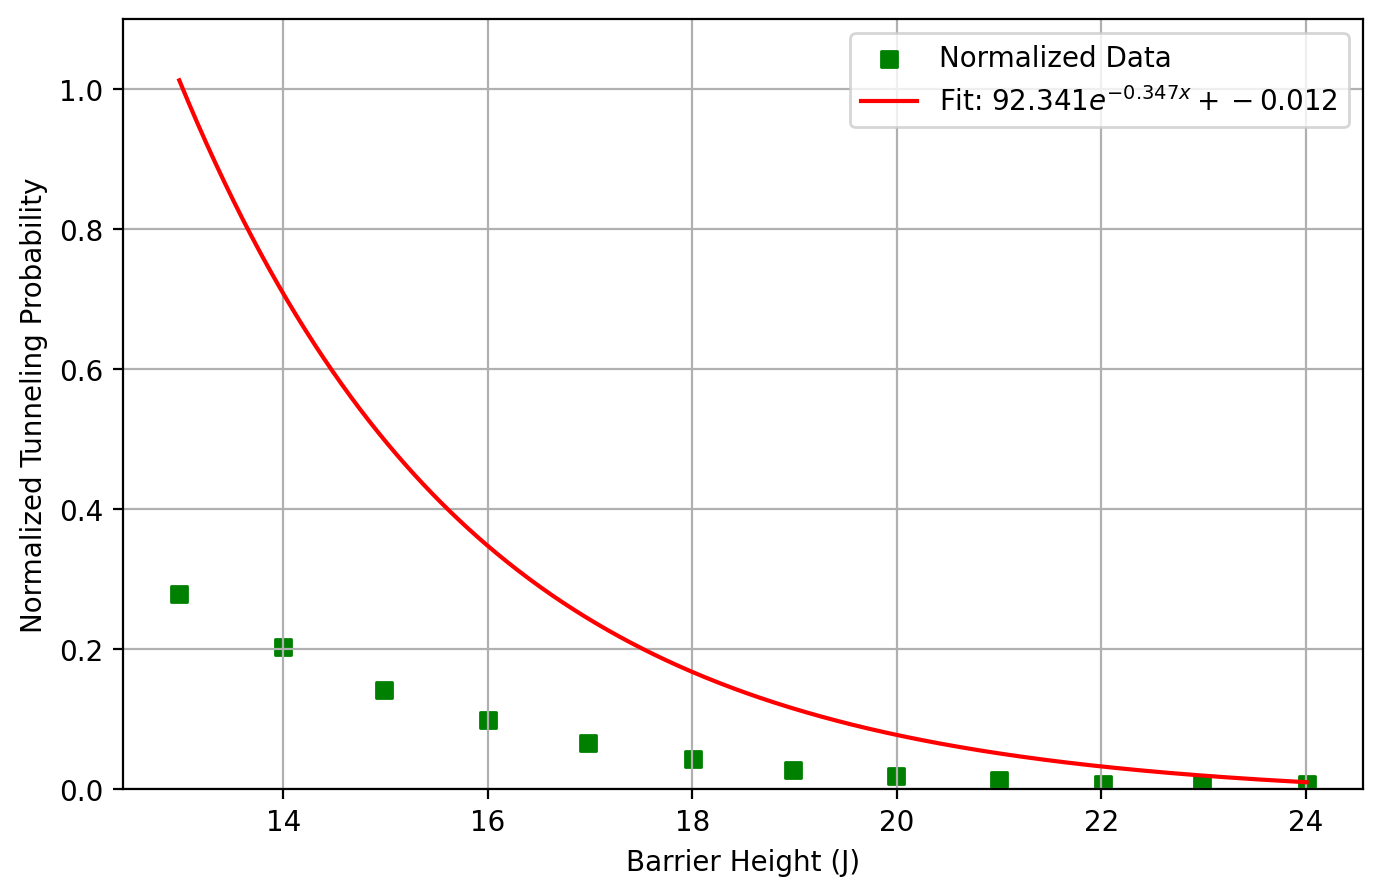

Normalization factor (max original y): 0.279617
Fit parameters for normalized data:
Amplitude (a): 92.34080
Decay rate (b): 0.34670
Offset (c): -0.01206


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Original dataset
x_data = np.array([12.981465560729667, 13.997996353647844, 14.984799287213468,
                   16.00100324420186, 16.977645843428537, 18.00351277573229,
                   18.98986098104778, 19.995861972923777, 21.001834544284137,
                   22.01768324482711, 22.98413708919921, 24.009790867635715])

y_data = np.array([0.2796166640851365, 0.20339426218209888, 0.14157679862785744,
                   0.09849556000494508, 0.06693599841981923, 0.044029062819286535,
                   0.028321043828698045, 0.019820467602743586, 0.01420173166201777,
                   0.00714349660445901, 0.008723677273676733, 0.007430543812356305])

# Normalize y-data so maximum is 1
#y_normalized = y_data / np.max(y_data)

# Exponential decay function
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Perform the fit on normalized data
params, _ = curve_fit(exponential_decay, x_data, y_normalized, p0=[1, 0.3, 0.1])
a, b, c = params

# Generate fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = exponential_decay(x_fit, a, b, c)

# Create the plot
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Normalized Data', color='green', marker='s')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: ${a:.3f}e^{{-{b:.3f}x}} + {c:.3f}$')
plt.xlabel('Barrier Height (J)')
plt.ylabel('Normalized Tunneling Probability')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)  # Set y-axis limits to show from 0 to slightly above 1
plt.show()

# Print the normalization factor and parameters
print(f"Normalization factor (max original y): {np.max(y_data):.6f}")
print(f"Fit parameters for normalized data:")
print(f"Amplitude (a): {a:.5f}")
print(f"Decay rate (b): {b:.5f}")
print(f"Offset (c): {c:.5f}")

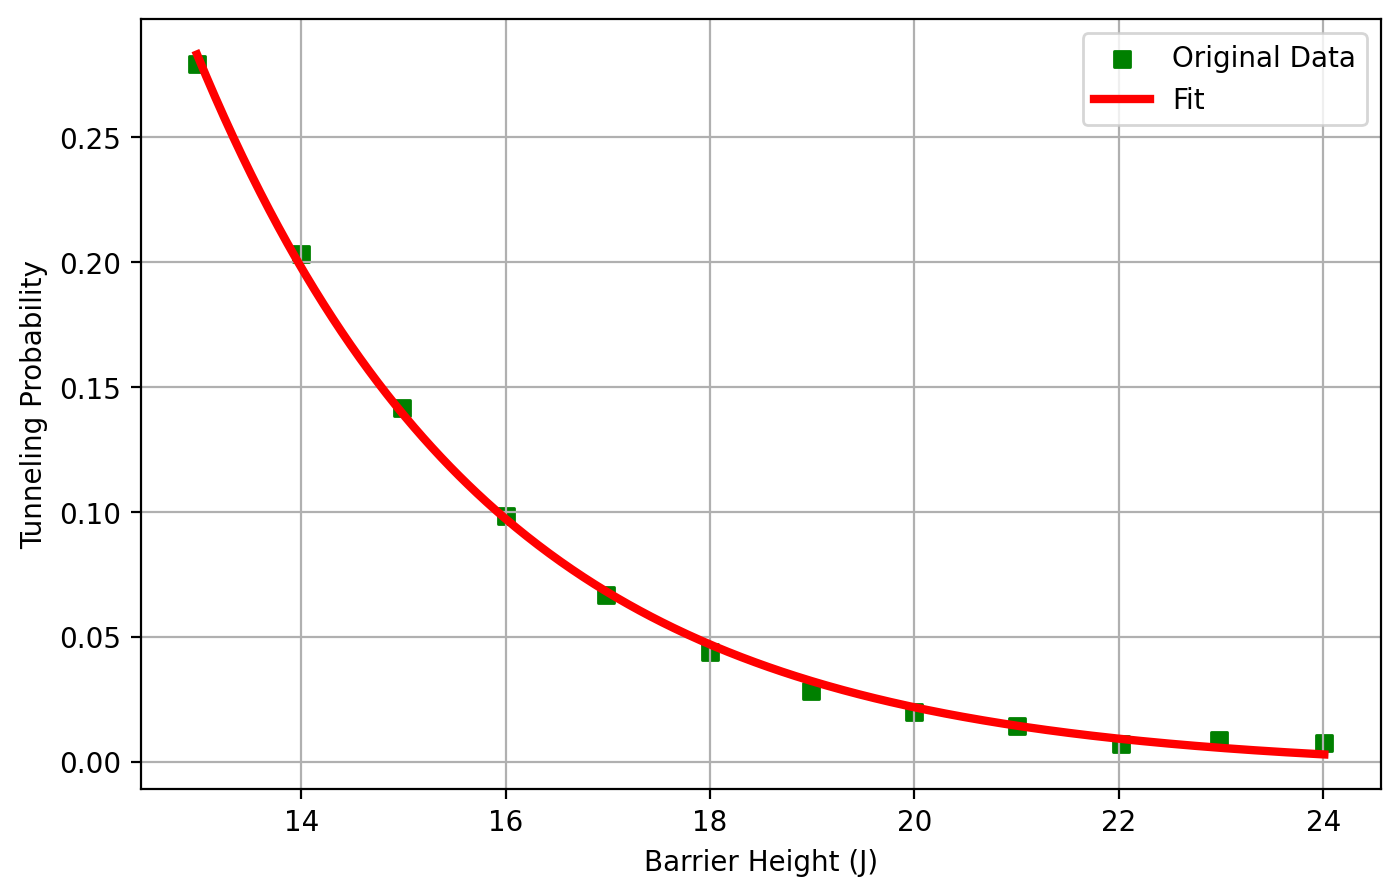

Fitted parameters with uncertainties:
Amplitude (a): 25.82002 ± 3.64585
Decay rate (b): 0.34670 ± 0.01091 (units of 1/[width])
Offset (c): -0.00337 ± 0.00246
R-squared: 0.998725

Physical interpretation:
- The decay rate b = 0.347 suggests the transmission coefficient follows:
  T ≈ exp(-0.347·L), where L is barrier width
- The offset c ≈ -0.003 may represent background noise or measurement floor


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your specified dataset
x_data = np.array([12.981465560729667, 13.997996353647844, 14.984799287213468,
                   16.00100324420186, 16.977645843428537, 18.00351277573229,
                   18.98986098104778, 19.995861972923777, 21.001834544284137,
                   22.01768324482711, 22.98413708919921, 24.009790867635715])

y_data = np.array([0.2796166640851365, 0.20339426218209888, 0.14157679862785744,
                   0.09849556000494508, 0.06693599841981923, 0.044029062819286535,
                   0.028321043828698045, 0.019820467602743586, 0.01420173166201777,
                   0.00714349660445901, 0.008723677273676733, 0.007430543812356305])

# Define exponential decay function with offset
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the curve with improved initial guesses
params, covariance = curve_fit(exponential_decay, x_data, y_data, 
                              p0=[1.0, 0.1, 0.01], maxfev=10000)
a, b, c = params

# Generate fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = exponential_decay(x_fit, a, b, c)

# Calculate parameter uncertainties
perr = np.sqrt(np.diag(covariance))

# Calculate R-squared
residuals = y_data - exponential_decay(x_data, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Original Data', color='g', marker='s')
plt.plot(x_fit, y_fit, 'r-', linewidth=3, 
         label=('Fit'))

plt.xlabel('Barrier Height (J)')
plt.ylabel('Tunneling Probability')
plt.legend(loc='upper right')
plt.grid()  
plt.show()

# Print detailed results
print(f"Fitted parameters with uncertainties:")
print(f"Amplitude (a): {a:.5f} ± {perr[0]:.5f}")
print(f"Decay rate (b): {b:.5f} ± {perr[1]:.5f} (units of 1/[width])")
print(f"Offset (c): {c:.5f} ± {perr[2]:.5f}")
print(f"R-squared: {r_squared:.6f}")
print(f"\nPhysical interpretation:")
print(f"- The decay rate b = {b:.3f} suggests the transmission coefficient follows:")
print(f"  T ≈ exp(-{b:.3f}·L), where L is barrier width")
print(f"- The offset c ≈ {c:.3f} may represent background noise or measurement floor")

Fitted parameters: A = 0.477, κ = 0.848 nm⁻¹, C = 0.481


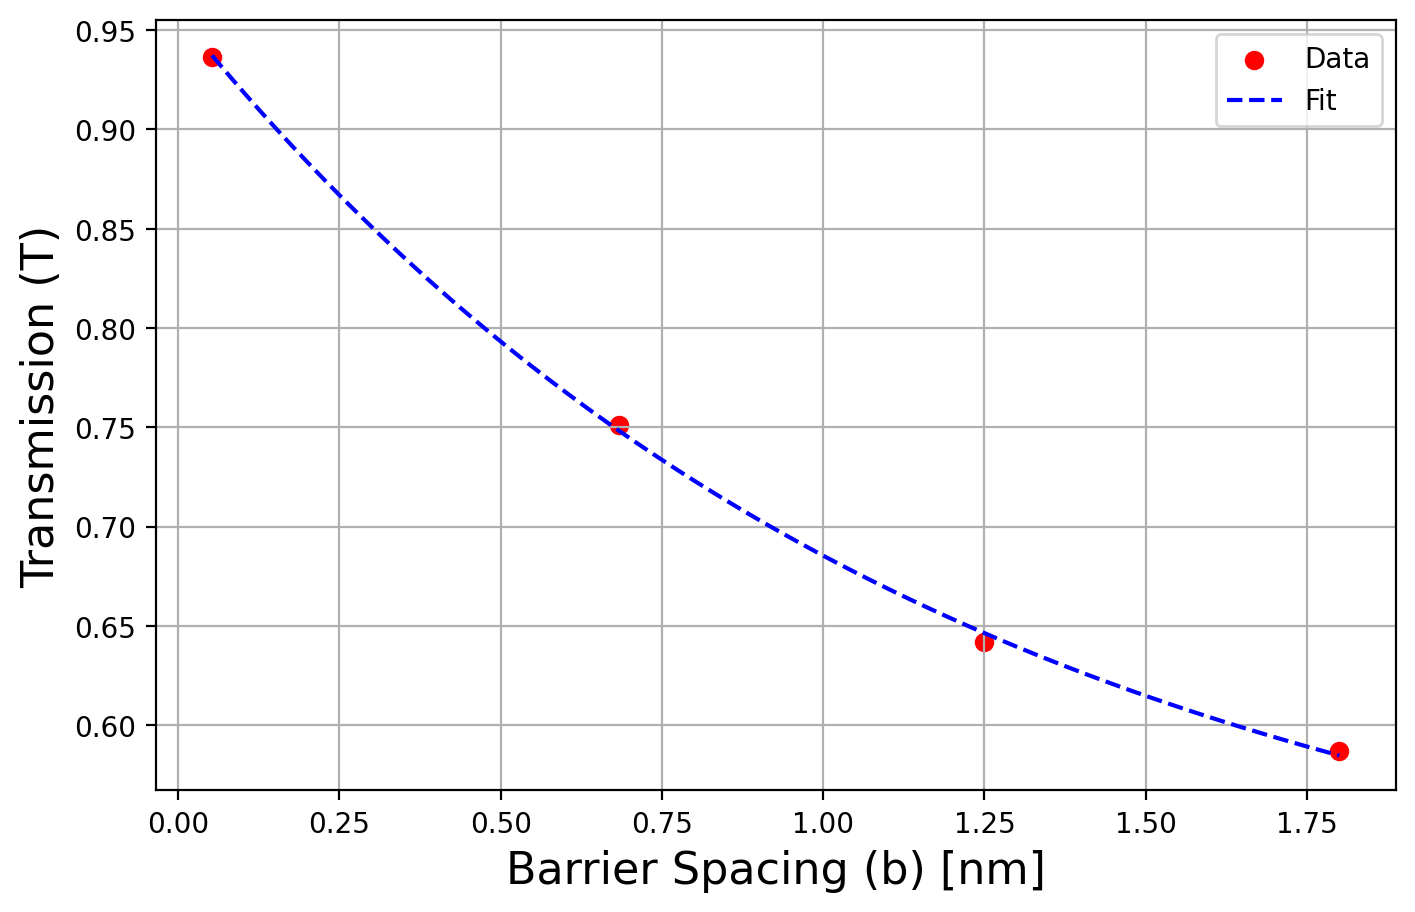

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your data
peak_x = np.array([0.0526318, 0.68421, 1.25, 1.8])  # Barrier spacing (b)
peak_y = np.array([0.93665616, 0.75122122, 0.64178685, 0.58687864])  # Transmission (T)

# Define exponential decay function: T(b) = A * exp(-κb) + C
def exponential_decay(b, A, κ, C):
    return A * np.exp(-κ * b) + C

# Fit the model to the data
params, covariance = curve_fit(exponential_decay, peak_x, peak_y, p0=[1, 1, 0.5])  # Initial guesses

# Extract fitted parameters
A_fit, κ_fit, C_fit = params
print(f"Fitted parameters: A = {A_fit:.3f}, κ = {κ_fit:.3f} nm⁻¹, C = {C_fit:.3f}")

# Generate fitted curve
b_fit = np.linspace(min(peak_x), max(peak_x), 100)
T_fit = exponential_decay(b_fit, A_fit, κ_fit, C_fit)

# Plot data and fit
plt.figure(figsize=(8, 5))
plt.scatter(peak_x, peak_y, color='red', label='Data')
plt.plot(b_fit, T_fit, '--', color='blue', label=('Fit'))
plt.xlabel('Barrier Spacing (b) [nm]', fontsize = 16)
plt.ylabel('Transmission (T)', fontsize = 16)
plt.legend()
plt.grid(True)
plt.show()

In [0]:
import matplotlib.pyplot as plt

# Extract barrier widths and coefficients
barrier_heights = sorted(coefficients.keys())  # Ensure barrier widths are sorted
R_values = [coefficients[w]["R"] for w in barrier_heights]  # Reflection coefficients
T_values = [coefficients[w]["T"] for w in barrier_heights]  # Transmission coefficients
B_values = [coefficients[w]["B"] for w in barrier_heights]  # Barrier coefficients

# Plot R, T, and B vs. Barrier Width
plt.figure(figsize=(8, 5))
plt.plot(barrier_heights, R_values, marker='o', linestyle='-', label="Reflection (R)", color='red')
plt.plot(barrier_heights, T_values, marker='s', linestyle='-', label="Transmission (T)", color='green')
plt.plot(barrier_heights, B_values, marker='^', linestyle='-', label="Barrier (B)", color='blue')

# Labels and title
plt.xlabel("Barrier Height (J)")
plt.ylabel("Probability Coefficients")
plt.title("Probability Coefficients vs Barrier Height")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

import matplotlib.pyplot as plt

# Extract spacing and corresponding transmission values
T_values = [coefficients[w]["T"] for w in Barrier_widths]
plt.figure(figsize=(8, 5))
plt.plot(spacing_values, T_values, marker='o', linestyle='-', color='g', label="Transmission (T)")
plt.xlabel("Barrier Spacing")
plt.ylabel("Transmission Probability (T)")
plt.title("Transmission vs. Barrier Spacing")
plt.legend()
plt.grid(True)
plt.show()

In [0]:
  # Define speed range (more points for smoother curves)
v_g_values = np.linspace(1, 15, 20)  # Group velocities to test

# Dictionary to store coefficients
coefficients = {'R': [], 'T': [], 'B': []}
v_g_list = []

for v_g in v_g_values:
    # Define potential barrier (fixed width, varying speed)
    potential = p.FinitePotentialWell(mass=1, width=5, xmin=-2.5, v0=30)
    
    k0 = mass * v_g / hbar  # Wave number
    p0 = hbar * k0  # Momentum
    
    # Create Hamiltonian object and solve for eigenvalues/eigenvectors
    A = H.Hamiltonian(potential, x)
    eigenvalues, eigenvectors = A.solve()

    # Define and normalize the initial Gaussian wave packet
    wavefunc = np.exp(-((x - x0) ** 2) / (2 * sigma ** 2)) * np.exp(-1j * k0 * x)
    wavefunc /= np.linalg.norm(wavefunc) * np.sqrt(deltaX)

    # Identity matrix
    I = np.identity(N)

    # Build Hamiltonian matrix
    H_mat = diags([A.lowerDiag, A.mainDiag, A.upperDiag], offsets=[-1, 0, 1]).toarray()

    # Define time step parameters
    fps = 30  # Frames per second
    duration = 15  # seconds
    simulationTime = 2  # seconds
    deltaT = simulationTime / (fps * duration)

    # Define M1 and M2 matrices
    M1 = I - (1j * deltaT) / (2 * hbar) * H_mat
    M2 = I + (1j * deltaT) / (2 * hbar) * H_mat

    # Extract banded diagonals for efficient solving
    lowerDiag_M1 = np.diag(M1, k=-1)  # subdiagonal
    mainDiag_M1 = np.diag(M1, k=0)    # main diagonal
    upperDiag_M1 = np.diag(M1, k=1)    # superdiagonal

    M1_banded = np.vstack([
        np.append(upperDiag_M1, [0]),  # Superdiagonal padded at the end
        mainDiag_M1,                   # Main diagonal
        np.append([0], lowerDiag_M1)    # Subdiagonal padded at the beginning
    ])

    # Time evolution loop
    wavefunc_history = [wavefunc]
    timesteps = fps * duration
    for _ in range(timesteps):
        rhs = M2 @ wavefunc_history[-1]  # Compute right-hand side
        wavefunc = solve_banded((1, 1), M1_banded, rhs)  # Solve Ax = b
        wavefunc_history.append(wavefunc)

    # Convert to array for easier slicing
    wavefunc_history = np.array(wavefunc_history)

    # Final wavefunction (after evolution)
    psi_final = wavefunc_history[-1]
    
    # Regions
    x_I = x[x < potential.xmin]                                # Incident region
    x_T = x[x > potential.xmin + potential.width]             # Transmitted region
    x_B = x[(x > potential.xmin) & (x < potential.xmin + potential.width)]  # Inside barrier

    # Calculate probabilities
    psi_R = np.abs(psi_final[x < potential.xmin])**2
    psi_T = np.abs(psi_final[x > potential.xmin + potential.width])**2
    psi_B = np.abs(psi_final[(x > potential.xmin) & (x < potential.xmin + potential.width)])**2

    # Integrate probability densities
    R = simps(psi_R, x_I)
    T = simps(psi_T, x_T)
    B = simps(psi_B, x_B)

    # Store coefficients
    coefficients['R'].append(R)
    coefficients['T'].append(T)
    coefficients['B'].append(B)
    v_g_list.append(v_g)

# Convert to numpy arrays for plotting
v_g_array = np.array(v_g_list)
R_array = np.array(coefficients['R'])
T_array = np.array(coefficients['T'])
B_array = np.array(coefficients['B'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(v_g_array, R_array, 'r-', label='Reflection (R)', linewidth=2)
plt.plot(v_g_array, T_array, 'g-', label='Transmission (T)', linewidth=2)
plt.plot(v_g_array, B_array, 'b-', label='Barrier (B)', linewidth=2)

# Add theoretical expectations
# For a rectangular barrier, the transmission coefficient T should increase with energy
# We can plot a simple approximation for comparison
E = 0.5 * mass * v_g_array**2  # Classical energy
V0 = 15  # Barrier height
# Simple approximation (not exact quantum result)
T_theory = 1 / (1 + (V0**2 * np.sinh(1)**2)/(4*E*(V0-E)))  # Approximate formula
T_theory = np.where(E > V0, 1/(1 + (V0**2 * np.sin(1)**2)/(4*E*(E-V0))), T_theory)  # For E > V0
plt.plot(v_g_array, T_theory, 'g--', label='Theoretical T (approx)', alpha=0.5)

plt.xlabel('Group Velocity (v_g)')
plt.ylabel('Probability Coefficient')
plt.title('Transmission and Reflection Coefficients vs. Group Velocity')
plt.legend()
plt.grid(True, alpha=0.3)

# Check conservation of probability
plt.figure(figsize=(10, 6))
plt.plot(v_g_array, R_array + T_array + B_array, 'k-', label='R + T + B')
plt.axhline(1, color='r', linestyle='--', label='Conservation')
plt.xlabel('Group Velocity (v_g)')
plt.ylabel('Total Probability')
plt.title('Conservation of Probability Check')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Print some key results
print("\nKey Results:")
print(f"Maximum transmission: {np.max(T_array):.3f} at v_g = {v_g_array[np.argmax(T_array)]:.2f}")
print(f"Minimum reflection: {np.min(R_array):.3f} at v_g = {v_g_array[np.argmin(R_array)]:.2f}")

Fitted parameters: A = 0.578, κ = -0.666 nm⁻¹, C = -0.071


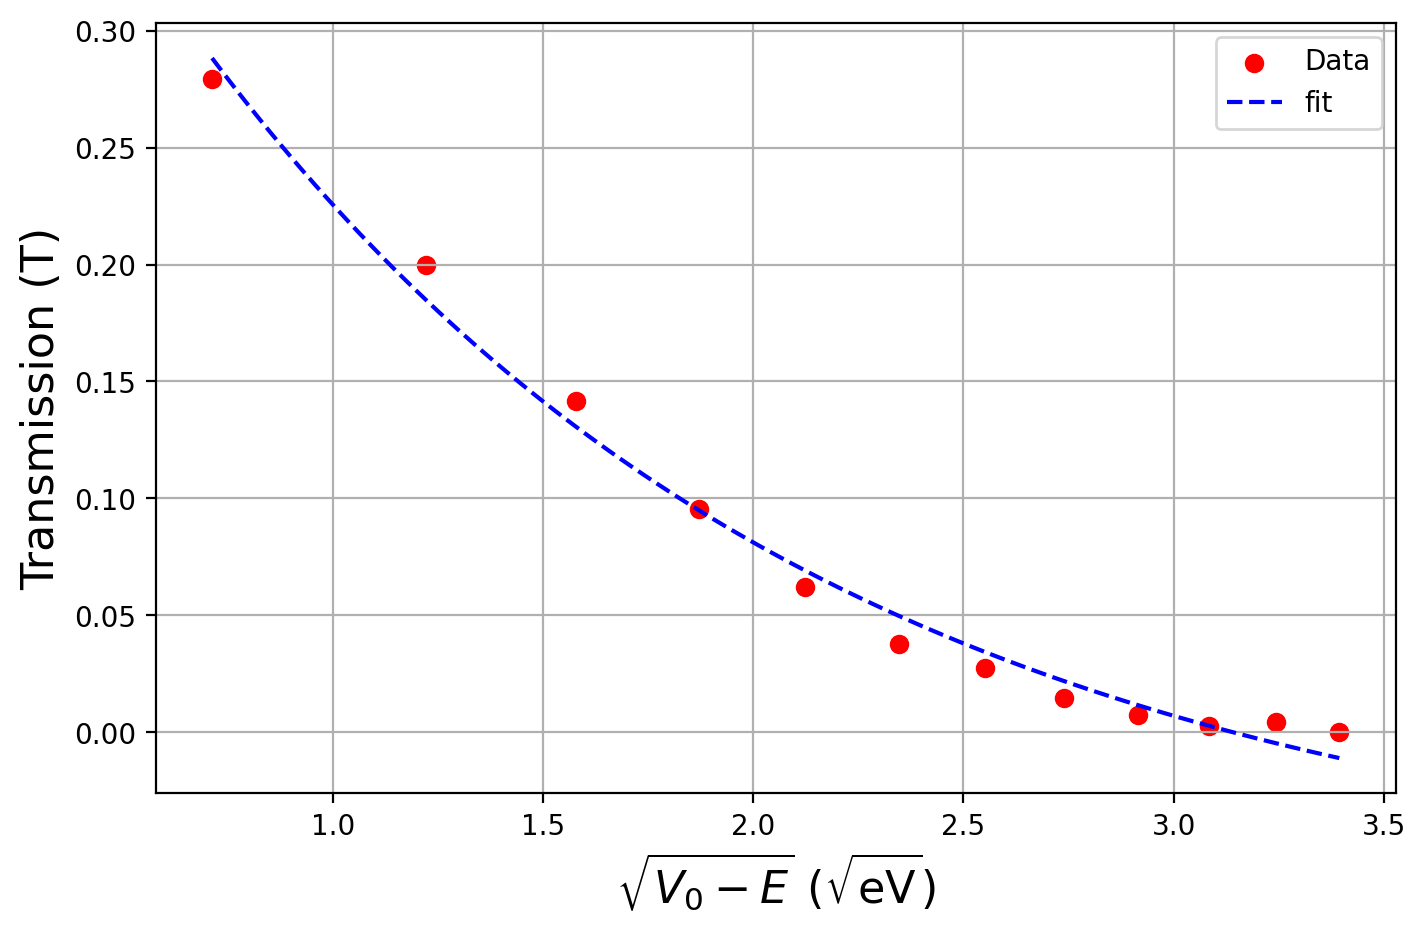

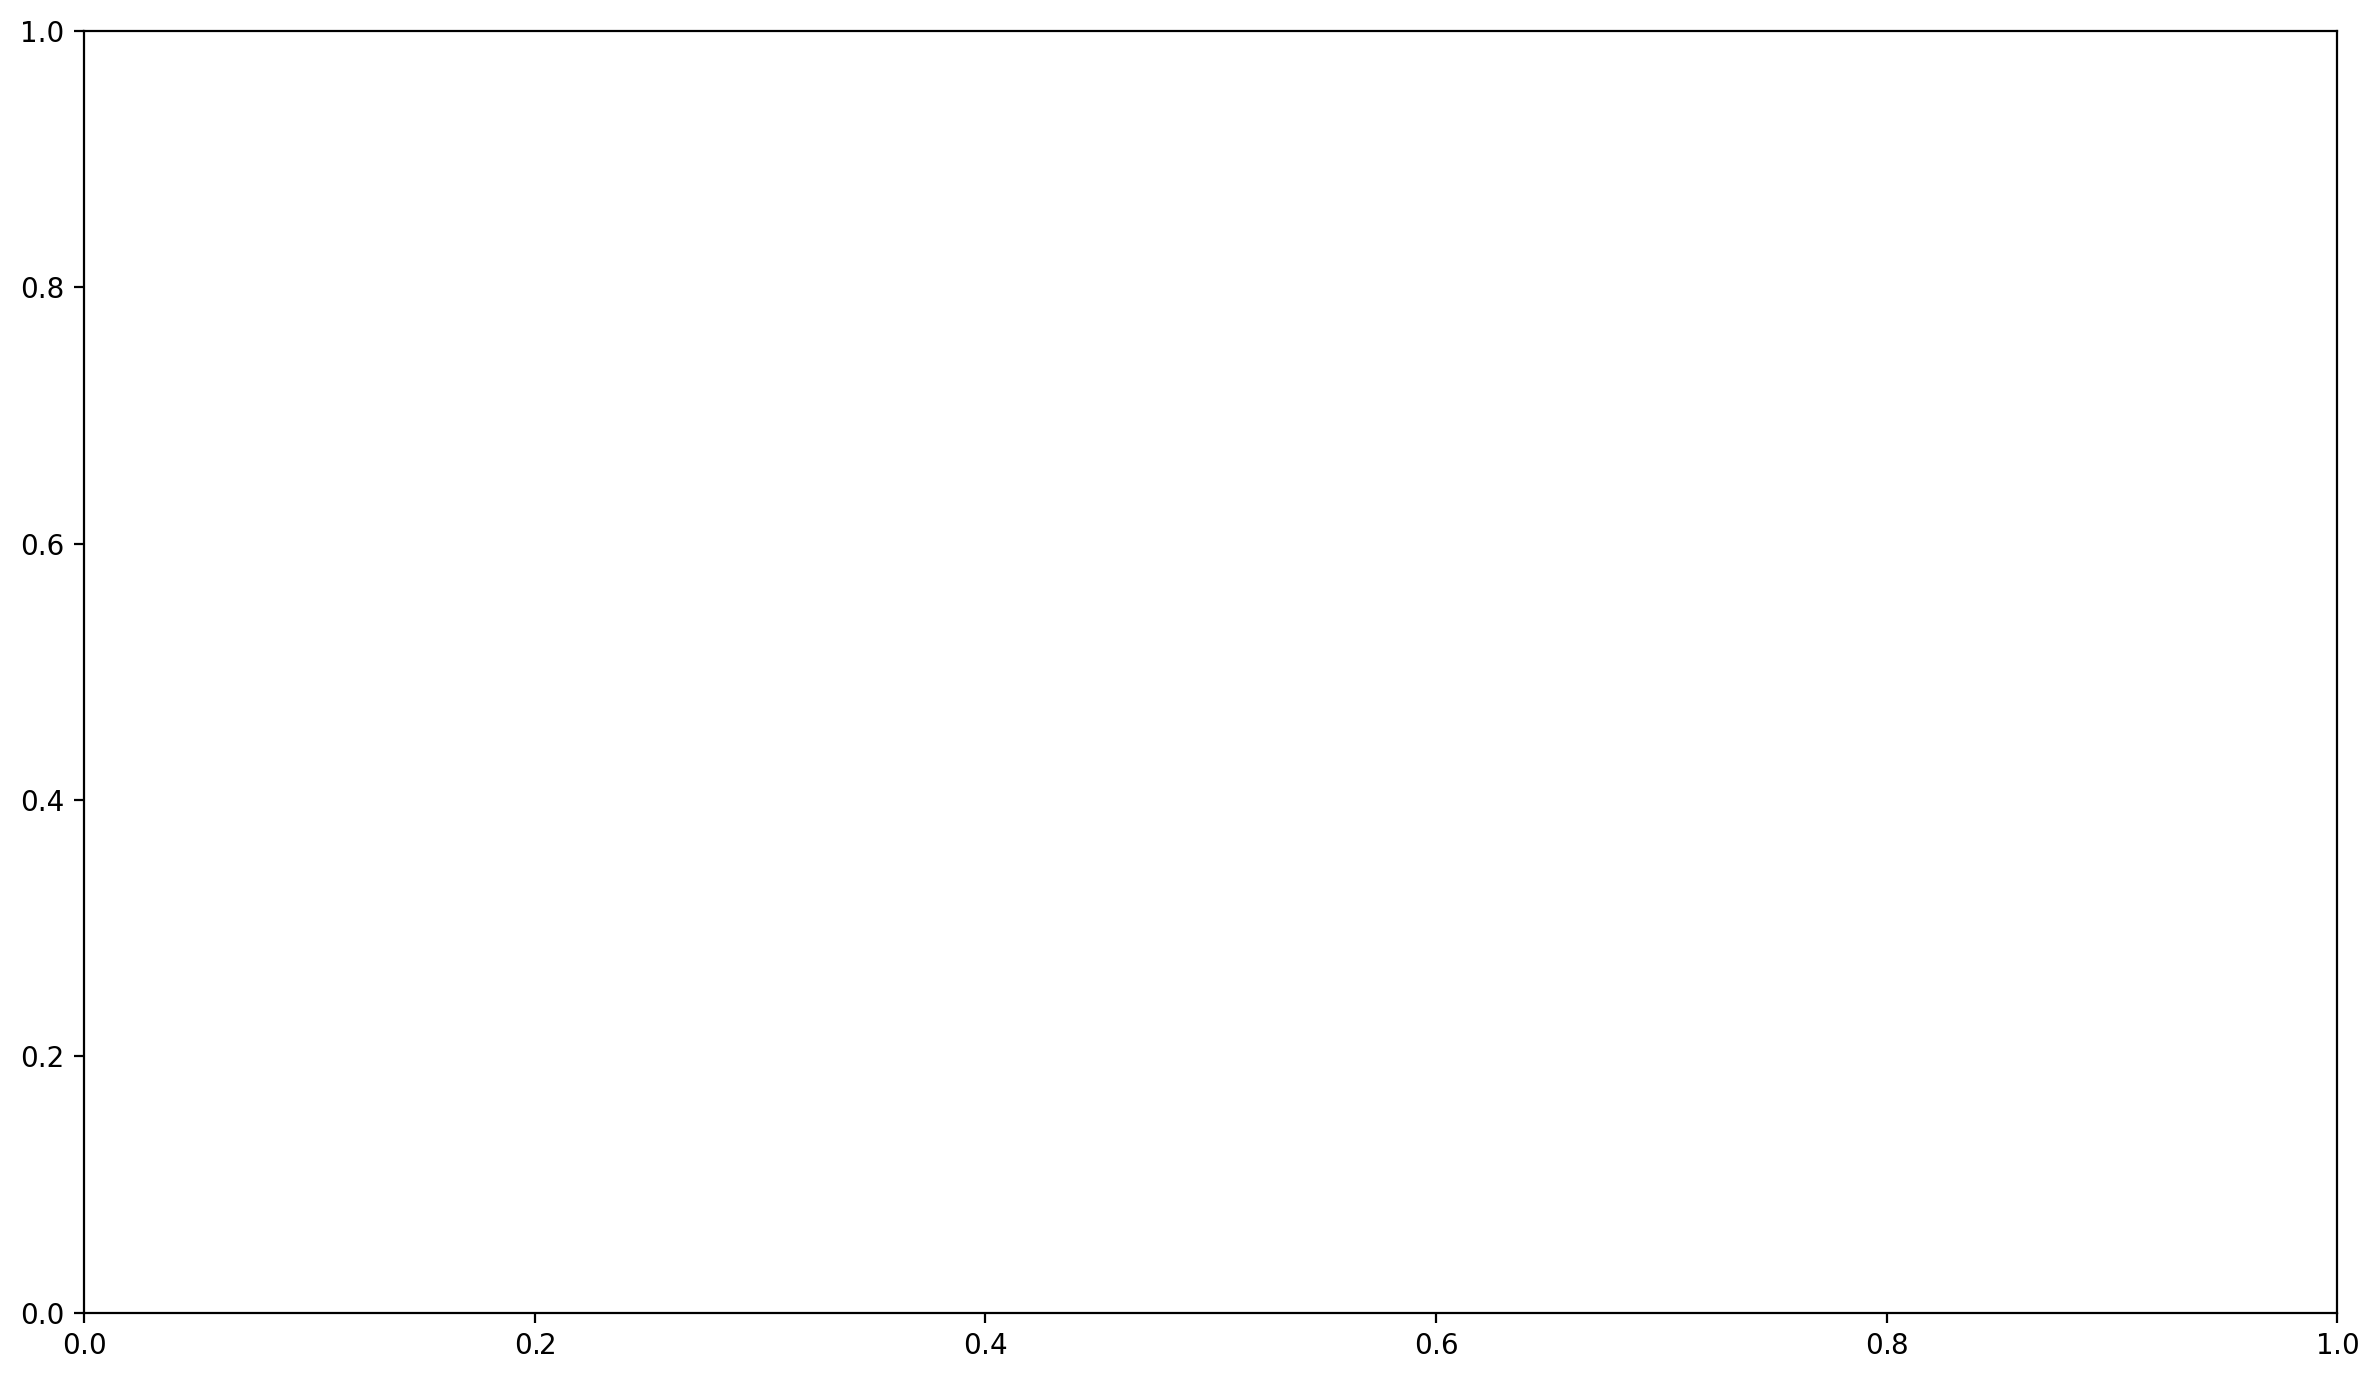


Fitted parameters with uncertainties:
A = 0.57779 ± 0.02327
κ = -0.66646 ± 0.09254
C = -0.07118 ± 0.02236


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential decay function: T(b) = A * exp(κb) + C
def exponential_decay(b, A, κ, C):
    return A * np.exp(κ * b) + C

x_data2 = np.sqrt(np.array([13.007241598803438, 13.992649934206208, 14.988134282134059, 
                   16.003456671718943, 17.009045576116712, 18.00485817941011, 
                   19.01067543536652, 19.996740281500387, 20.992724148462766, 
                   22.00846042524769, 23.01439185698342, 24.02026620082949]) - 12.5)


y_data2 = np.array([0.27930535455861083, 0.19971056439942114, 0.1418234442836469, 
                   0.09551374819102754, 0.06222865412445733, 0.0376266280752533, 
                   0.02749638205499294, 0.01447178002894356, 0.00723589001447178, 
                   0.0028943560057888007, 0.004341534008682979, 0.0])

# Fit the model to the data
params, covariance = curve_fit(exponential_decay, x_data2, y_data2, p0=[1, -1, 0.1], maxfev=2000)  # Adjusted initial guesses

# Extract fitted parameters
A_fit, κ_fit, C_fit = params
print(f"Fitted parameters: A = {A_fit:.3f}, κ = {κ_fit:.3f} nm⁻¹, C = {C_fit:.3f}")

# Generate fitted curve
b_fit = np.linspace(min(x_data2), max(x_data2), 100)
T_fit = exponential_decay(b_fit, A_fit, κ_fit, C_fit)

# Create plot
plt.figure(figsize=(8, 5))

# Plot original data and fit
plt.scatter(x_data2, y_data2, color='red', label='Data')
plt.plot(b_fit, T_fit, '--', color='blue', label = "fit")

# Parameters for the specified exponential to plot
A_spec = 1.073
B_spec = -3.081
C_spec = 0.076

# Generate x values that cover the range of your data
b_spec = np.linspace(0, 10, 100)
T_spec = A_spec * np.exp(B_spec * b_spec) + C_spec

# Plot the specified exponential (not a fit, just the function)
#plt.plot(b_spec, T_spec, '-', color='green')

# Formatting
plt.xlabel(r'$\sqrt{V_0 - E}$ ($\mathrm{\sqrt{eV}}$)', fontsize=16)
plt.ylabel('Transmission (T)', fontsize = 16)
plt.legend()
plt.grid(True)
#plt.ylim(0, 1)  # Adjusted to better show the data range
plt.show()


# Scientific notation if needed
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.tight_layout()
plt.show()



# Extract fitted parameters
A_fit, κ_fit, C_fit = params
perr = np.sqrt(np.diag(covariance))  # Standard deviations of parameters

# Print the fitted parameters with uncertainties
print("\nFitted parameters with uncertainties:")
print(f"A = {A_fit:.5f} ± {perr[0]:.5f}")
print(f"κ = {κ_fit:.5f} ± {perr[1]:.5f}")
print(f"C = {C_fit:.5f} ± {perr[2]:.5f}")

In [0]:
# First dataset (increasing)
x_data1 = np.array([13.047688938553886, 14.123481244610232, 14.930234268130521, 
                  16.005724429127298, 17.081076374830868, 17.88751921751873, 
                  18.96269437621936, 20.037805248737104, 21.112877549545118, 
                  21.919162891084902, 22.994198227337755, 24.020359763457368])

y_data1 = np.array([0.7238859442371915, 0.8035760608364794, 0.8540953576581137, 
                  0.9031479652171845, 0.9381855420450922, 0.9572525024584188, 
                  0.9743638771883272, 0.9849566329735086, 0.9916382173918538, 
                  0.9947345613905991, 0.9976679399157262, 0.9996002448171989])

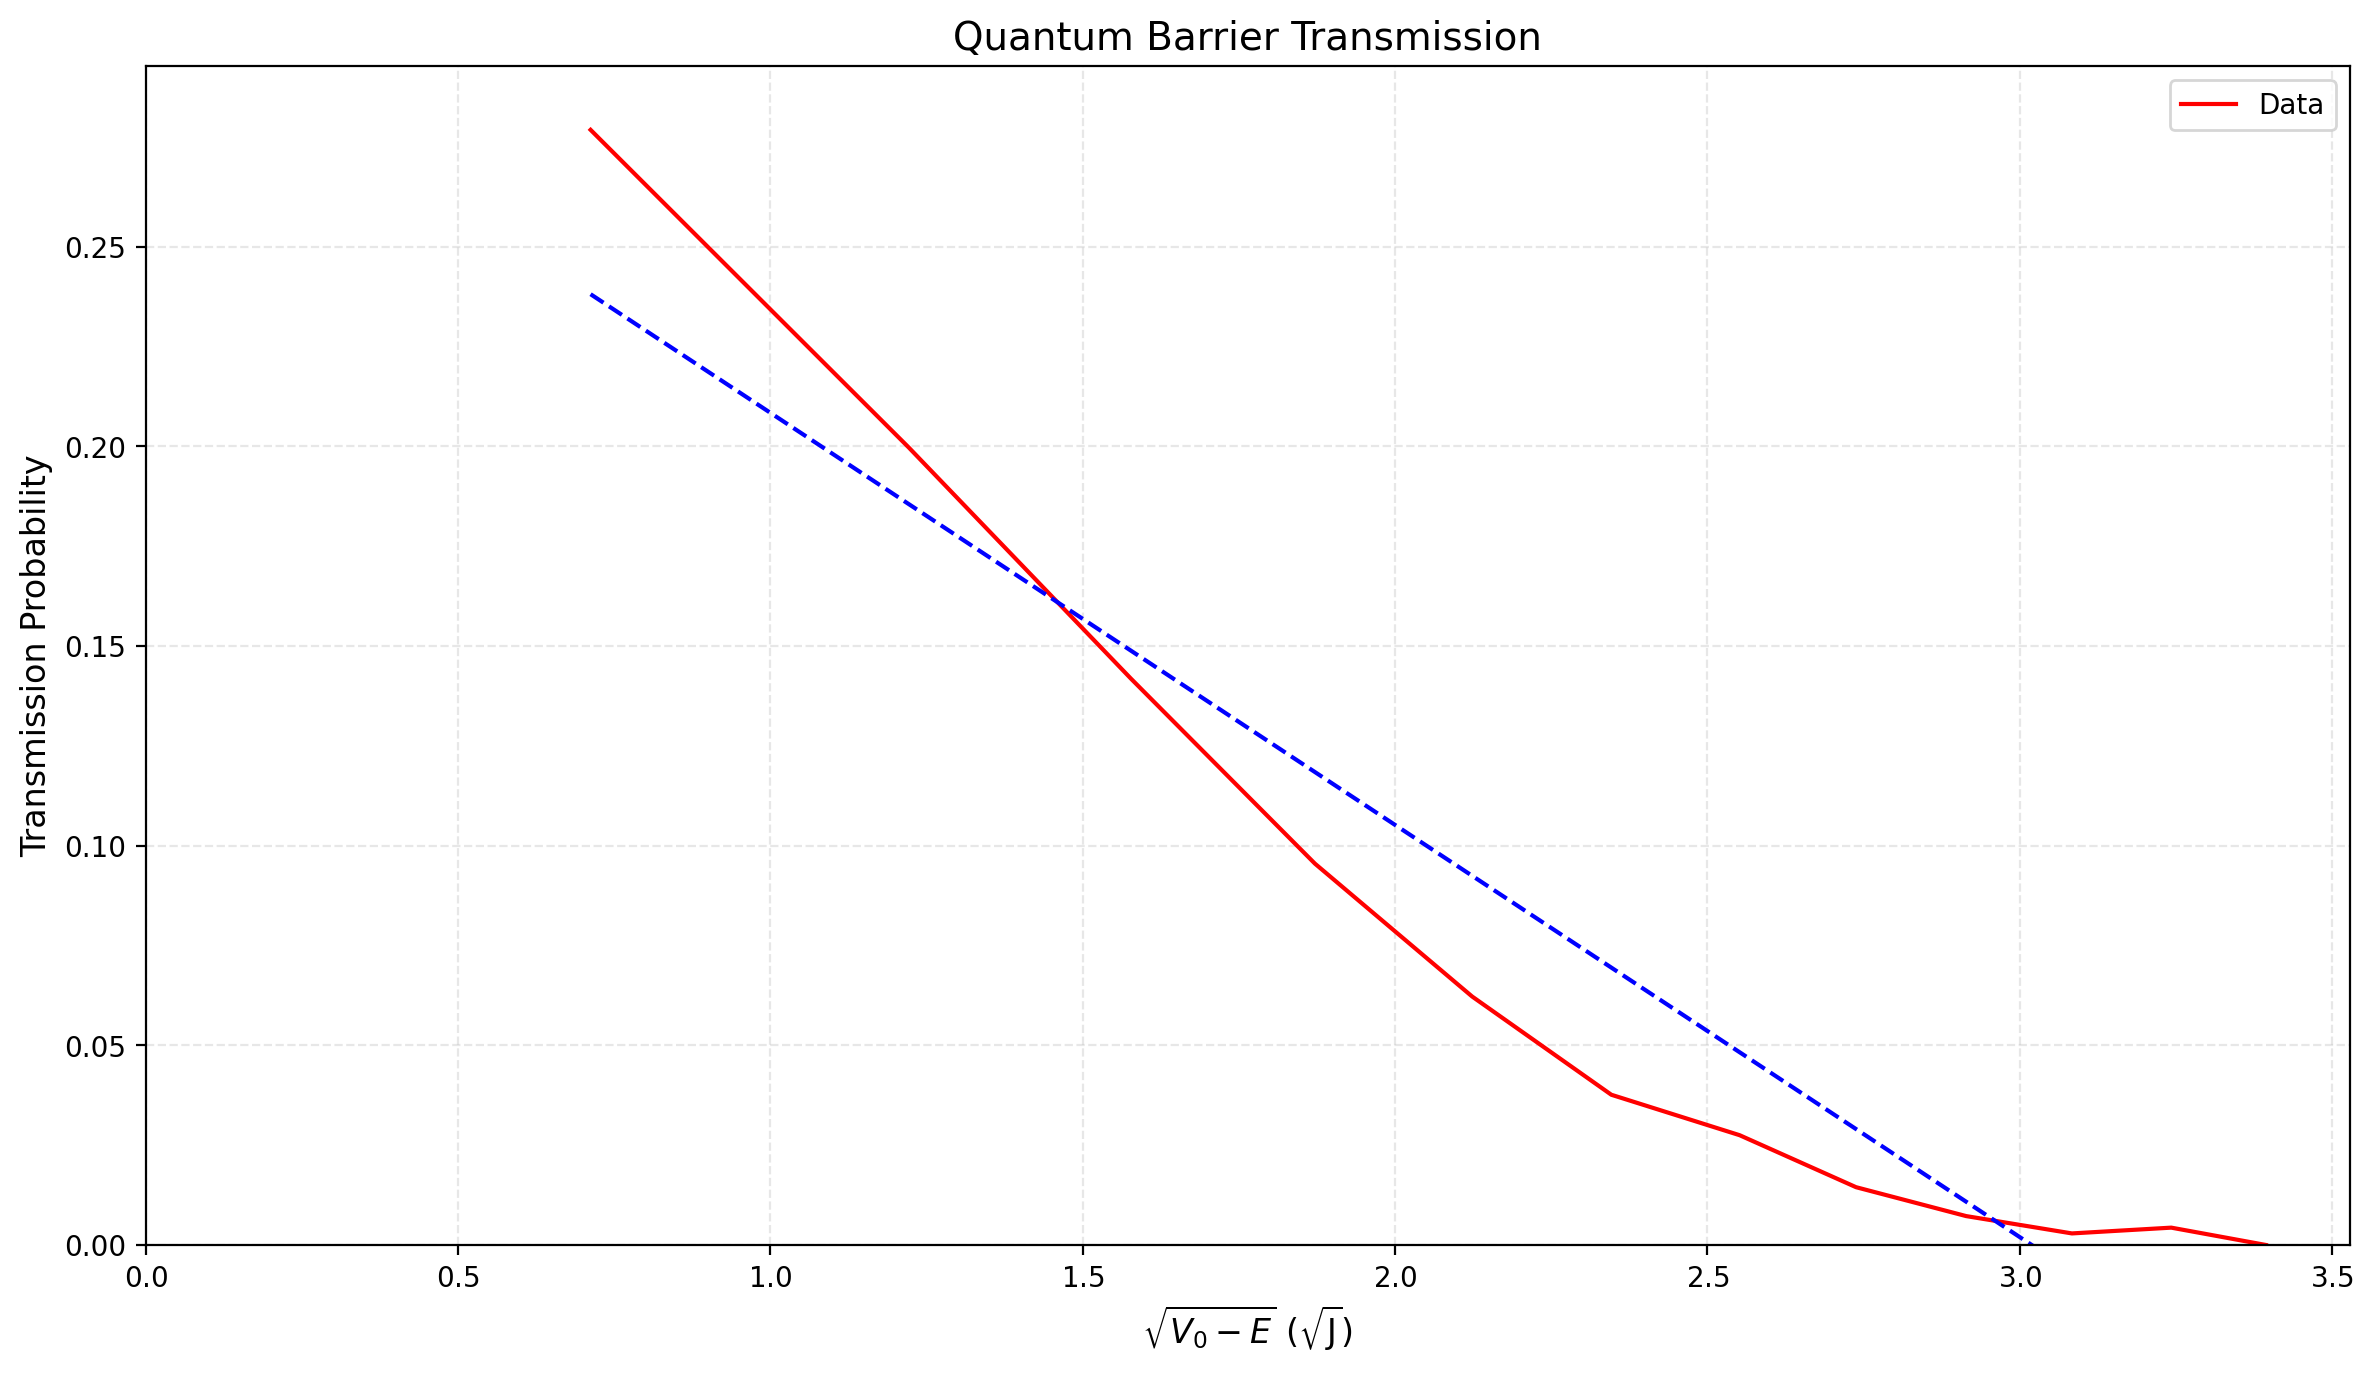

Fitted parameters with uncertainties:
A = -909.561 ± 1236232.768
κ = 0.000 ± 0.154 nm⁻¹
C = 909.873 ± 1236232.802


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential decay function: T(b) = A * exp(κb) + C
def exponential_decay(b, A, κ, C):
    return A * np.exp(κ * b) + C

x_data2 = np.sqrt(np.array([13.007241598803438, 13.992649934206208, 14.988134282134059, 
                   16.003456671718943, 17.009045576116712, 18.00485817941011, 
                   19.01067543536652, 19.996740281500387, 20.992724148462766, 
                   22.00846042524769, 23.01439185698342, 24.02026620082949]) - 12.5)

y_data2 = np.array([0.27930535455861083, 0.19971056439942114, 0.1418234442836469, 
                   0.09551374819102754, 0.06222865412445733, 0.0376266280752533, 
                   0.02749638205499294, 0.01447178002894356, 0.00723589001447178, 
                   0.0028943560057888007, 0.004341534008682979, 0.0])



params, covariance = curve_fit(exponential_decay, x_data2, y_data2, 
                              p0=[1, 10, 0.1], maxfev=10000)

# Extract fitted parameters and calculate errors
A_fit, κ_fit, C_fit = params
perr = np.sqrt(np.diag(covariance))  # Parameter errors

# Generate fitted curve with confidence band
b_fit = np.linspace(min(x_data2), max(x_data2), 100)
T_fit = exponential_decay(b_fit, *params)

# Calculate confidence band (1σ)
T_fit_upper = exponential_decay(b_fit, *(params + perr))
T_fit_lower = exponential_decay(b_fit, *(params - perr))

# Create plot with professional formatting
plt.plot(x_data2, y_data2,  color='red', label='Data')

# Plot fit with confidence band
plt.plot(b_fit, T_fit, '--', color='blue')


# Formatting for scientific report
plt.xlabel(r'$\sqrt{V_0 - E}$ ($\mathrm{\sqrt{J}}$)', fontsize=12)
plt.ylabel('Transmission Probability', fontsize=12)
plt.title('Quantum Barrier Transmission', fontsize=14)
plt.legend(fontsize=10, frameon=True, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust y-axis to show data properly
plt.ylim(bottom=0)
plt.xlim(left=0)

# Scientific notation if needed
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.tight_layout()
plt.show()

# Print fit results
print(f"Fitted parameters with uncertainties:")
print(f"A = {A_fit:.3f} ± {perr[0]:.3f}")
print(f"κ = {κ_fit:.3f} ± {perr[1]:.3f} nm⁻¹")
print(f"C = {C_fit:.3f} ± {perr[2]:.3f}")

In [0]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal, solve_banded
from sympy import symbols, lambdify
from scipy.integrate import simpson as simps
from scipy.sparse import diags
from scipy.optimize import curve_fit
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.optimize import curve_fit
import PotentialsNew as p
importlib.reload(p)
import HMatNew as H
importlib.reload(H)


###
#Transmission coefficient computation for the wave packet velocity investigation:
###

# These constants will be used to convert from natural units where h=m=c=e=1 to the appropriate units, such as J or eV
h_conv = 6.63e-34 # Js
hbar_conv = h_conv/(2*np.pi) # Js
c_conv = 299792458 # m/s
e_conv = 1.60e-19 # C
mass_elec = 9.11e-31 # kg
eps0_conv = 8.85e-12 # F/m

# Setting the bounds and deltaX
lower = -10 # Lowest x value
upper = 10 # Largest x value
N = 5000 # The number of points on the x axis
x = np.linspace(lower, upper, N) # The x axis split into N points
deltaX = (x[1] - x[0]) # Finds the separation between the two points

v0 = 15 # The height of the potential barrier used for the animation
L = 1 # The width of the potential barrier used for the animation

# Defining conversion factors
distance_conv = 1e-9 # m to nm
h = 1
hbar = 1
c = 1
e = 1
mass = 1

# Define Gaussian wave packet parameters
x0 = -5  # m, original position
sigma = 1  # Width of the packet


  # Compute corresponding wave number, kinda irrelevant when hbar and mass = 1
  # Compute momentum, again kinda irrelevant when hbar = 1

energyConversion = hbar_conv**2 / (mass_elec * distance_conv**2)




# Define barrier height range (more points for smoother curves)

v0 = 15 # Barrier heights to test


coefficients = {'R': [], 'T': [], 'B': []}
 


v_g = np.linspace(0.5,20,40)
  
Ek =12.5  # Particle kinetic energy

for vg in v_g:
    # Calculate sqrt(V0 - Ek) for x-axis
    k0 = mass * vg / hbar
    p0 = hbar * k0
    Ek = 0.5 * mass * vg**2
    # Define potential barrier (fixed width, varying height)
    potential = p.FinitePotentialWell(mass=1, width=1, xmin=-2.5, v0=v0)
    
    # Create Hamiltonian object and solve for eigenvalues/eigenvectors
    A = H.Hamiltonian(potential, x)
    eigenvalues, eigenvectors = A.solve()

    # Define and normalize the initial Gaussian wave packet
    wavefunc = np.exp(-((x - x0) ** 2) / (2 * sigma ** 2)) * np.exp(-1j * k0 * x)
    wavefunc /= np.linalg.norm(wavefunc) * np.sqrt(deltaX)

    # Identity matrix
    I = np.identity(N)

    # Build Hamiltonian matrix
    H_mat = diags([A.lowerDiag, A.mainDiag, A.upperDiag], offsets=[-1, 0, 1]).toarray()

    # Define time step parameters
    fps = 30  # Frames per second
    duration = 1  # seconds
    simulationTime = 15  # seconds
    deltaT = simulationTime / (fps * duration)

    # Define M1 and M2 matrices
    M1 = I - (1j * deltaT) / (2 * hbar) * H_mat
    M2 = I + (1j * deltaT) / (2 * hbar) * H_mat

    # Extract banded diagonals for efficient solving
    lowerDiag_M1 = np.diag(M1, k=-1)  # subdiagonal
    mainDiag_M1 = np.diag(M1, k=0)    # main diagonal
    upperDiag_M1 = np.diag(M1, k=1)    # superdiagonal

    M1_banded = np.vstack([
        np.append(upperDiag_M1, [0]),  # Superdiagonal padded at the end
        mainDiag_M1,                   # Main diagonal
        np.append([0], lowerDiag_M1)    # Subdiagonal padded at the beginning
    ])

    # Time evolution loop
    wavefunc_history = [wavefunc]
    timesteps = fps * duration
    for _ in range(timesteps):
        rhs = M2 @ wavefunc_history[-1]  # Compute right-hand side
        wavefunc = solve_banded((1, 1), M1_banded, rhs)  # Solve Ax = b
        wavefunc_history.append(wavefunc)

    # Convert to array for easier slicing
    wavefunc_history = np.array(wavefunc_history)

    # Final wavefunction (after evolution)
    psi_final = wavefunc_history[-1]
    
    # Regions
    x_I = x[x < potential.xmin]                                # Incident region
    x_T = x[x > potential.xmin + potential.width]             # Transmitted region
    x_B = x[(x > potential.xmin) & (x < potential.xmin + potential.width)]  # Inside barrier

    # Calculate probabilities
    psi_R = np.abs(psi_final[x < potential.xmin])**2
    psi_T = np.abs(psi_final[x > potential.xmin + potential.width])**2
    psi_B = np.abs(psi_final[(x > potential.xmin) & (x < potential.xmin + potential.width)])**2

    # Integrate probability densities
    R = simps(psi_R, x_I)
    T = simps(psi_T, x_T)
    B = simps(psi_B, x_B)

    # Store coefficients
    coefficients['R'].append(R)
    coefficients['T'].append(T)
    coefficients['B'].append(B)

# Convert to numpy arrays for plotting





vg_array = np.array(v_g)
R_array = np.array(coefficients['R'])
T_array = np.array(coefficients['T'])
B_array = np.array(coefficients['B'])


